<a href="https://colab.research.google.com/github/bahram3000/google_colab/blob/main/eth_period_and_prediction_calculate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_func_pkg import one_dimension_data,find_pivot,blind_boundary_exp_smooth_curve,most_frequency_cenarios,min_max_cenarios
import yfinance as yf

In [2]:
fbpdov0=pd.read_csv("/content/ethfbpdov.csv")
fbpdun0=pd.read_csv("/content/ethfbpdun.csv")

In [3]:
fbpdov1=fbpdov0.iloc[:,1].values
fbpdun1=fbpdun0.iloc[:,1].values

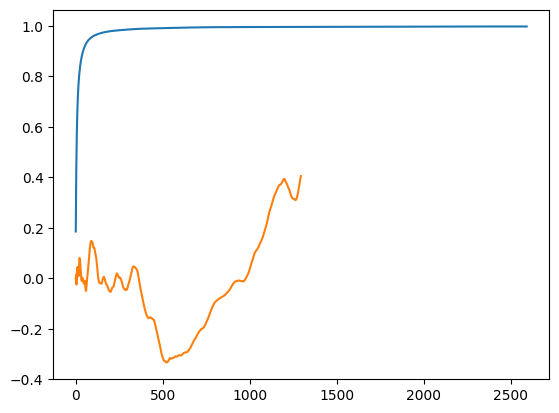

In [4]:
plt.plot(fbpdov1)
plt.plot(fbpdun1)

In [5]:
fp=find_pivot(fbpdun1)

In [6]:
fp[0]

array([  21,   90,  162,  237,  332,  936, 1198])

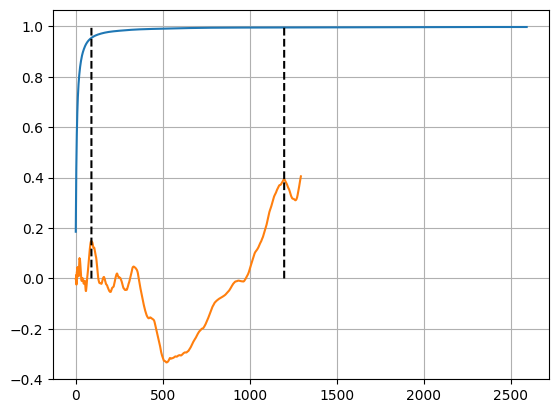

In [8]:
plt.plot(fbpdov1)
plt.plot(fbpdun1)
plt.plot([90]*(len(fbpdov1)+len(fbpdun1)),np.linspace(0,1,len(fbpdov1)+len(fbpdun1)),linestyle='--',c='black')
plt.plot([1198]*(len(fbpdov1)+len(fbpdun1)),np.linspace(0,1,len(fbpdov1)+len(fbpdun1)),linestyle='--',c='black')
plt.grid()
plt.show()

In [9]:
eth=yf.download("ETH-USD")

[*********************100%***********************]  1 of 1 completed


In [18]:
bbesc90=blind_boundary_exp_smooth_curve(eth.Close.values,90)

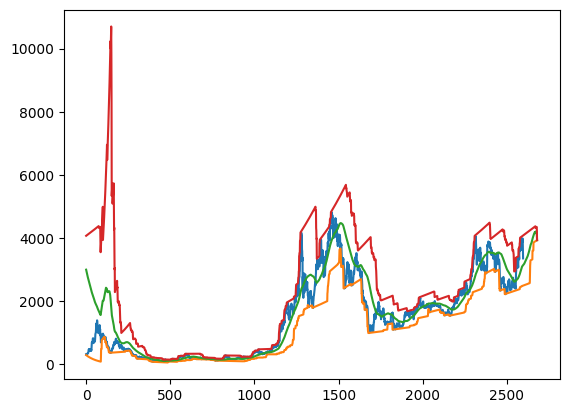

In [19]:
plt.plot(eth.Close.values)
plt.plot(bbesc90)
plt.show()

In [13]:
mfc90=most_frequency_cenarios(eth.Close.values,nbins=20,ngreater=0.95,lcenarios=90)

100%|██████████| 100/100 [00:23<00:00,  4.29it/s]


In [15]:
mm90=min_max_cenarios(eth.Close.values,lenc=90)

100%|██████████| 100/100 [01:09<00:00,  1.43it/s]


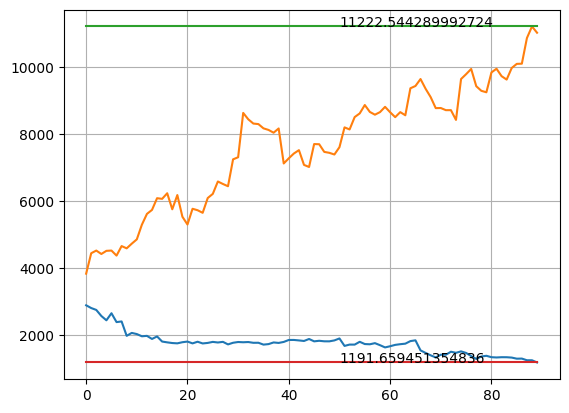

In [17]:
plt.plot(mm90[:,0])
plt.plot(mm90[:,1])
plt.plot([np.max(mm90[:,1])]*90)
plt.plot([np.min(mm90[:,0])]*90)
plt.text(x=50,y=np.max(mm90[:,1]),s=f'{np.max(mm90[:,1])}')
plt.text(x=50,y=np.min(mm90[:,0]),s=f'{np.min(mm90[:,0])}')
plt.grid()
plt.show()

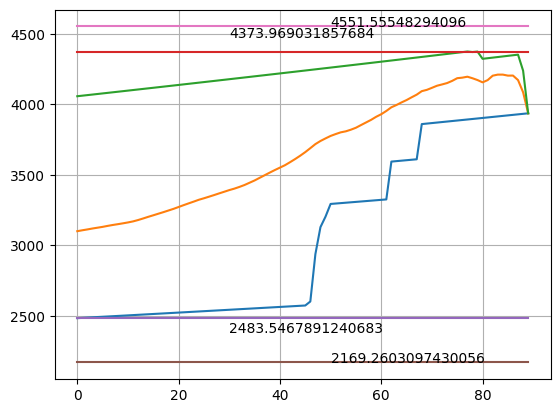

In [20]:
plt.plot(bbesc90[-90:])
plt.plot([np.max(bbesc90[-90:])]*90)
plt.plot([np.min(bbesc90[-90:])]*90)
plt.text(x=30,y=np.max(bbesc90[-90:])+100,s=f'{np.max(bbesc90[-90:])}')
plt.text(x=30,y=np.min(bbesc90[-90:])-100,s=f'{np.min(bbesc90[-90:])}')
plt.plot([mfc90[0]]*90)
plt.plot([mfc90[-1]]*90)
plt.text(x=50,y=mfc90[0],s=f'{mfc90[0]}')
plt.text(x=50,y=mfc90[-1],s=f'{mfc90[-1]}')
plt.grid()
plt.show()

In [22]:
bbesc1198=blind_boundary_exp_smooth_curve(eth.Close.values,1198)

In [23]:
mfc1198=most_frequency_cenarios(eth.Close.values,nbins=20,ngreater=0.95,lcenarios=1198)

100%|██████████| 100/100 [00:20<00:00,  4.85it/s]


In [24]:
mm1198=min_max_cenarios(eth.Close.values,num=100,lenc=1198)

100%|██████████| 100/100 [16:46<00:00, 10.07s/it]


Text(500, 60.57954996849207, '60.57954996849207')

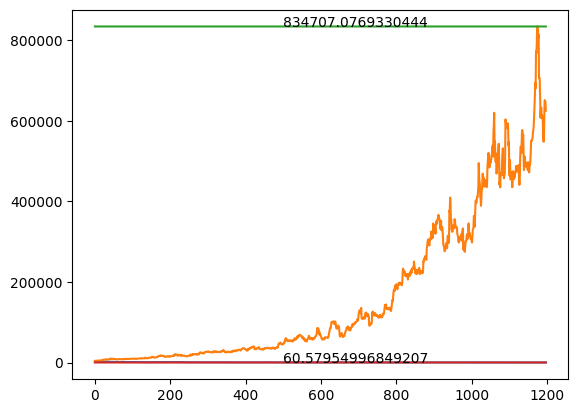

In [25]:
plt.plot(mm1198[:,0])
plt.plot(mm1198[:,1])
plt.plot([np.max(mm1198[:,1])]*1198)
plt.plot([np.min(mm1198[:,0])]*1198)
plt.text(x=500,y=np.max(mm1198[:,1]),s=f'{np.max(mm1198[:,1])}')
plt.text(x=500,y=np.min(mm1198[:,0]),s=f'{np.min(mm1198[:,0])}')

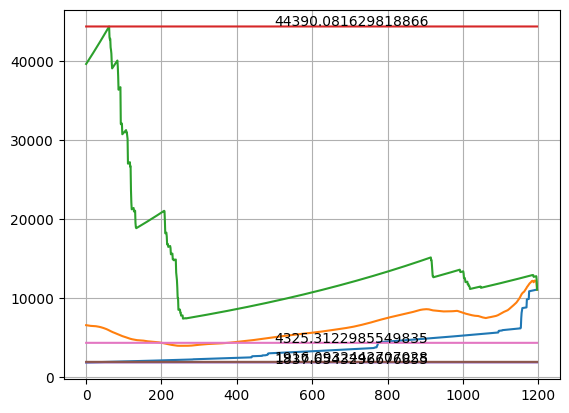

In [27]:
plt.plot(bbesc1198[-1198:])
plt.plot([np.max(bbesc1198[-1198:])]*1198)
plt.plot([np.min(bbesc1198[-1198:])]*1198)
plt.text(x=500,y=np.max(bbesc1198[-1198:])+100,s=f'{np.max(bbesc1198[-1198:])}')
plt.text(x=500,y=np.min(bbesc1198[-1198:])-100,s=f'{np.min(bbesc1198[-1198:])}')
plt.plot([mfc1198[0]]*1198)
plt.plot([mfc1198[-1]]*1198)
plt.text(x=500,y=mfc1198[0],s=f'{mfc1198[0]}')
plt.text(x=500,y=mfc1198[-1],s=f'{mfc1198[-1]}')
plt.grid()
plt.show()

Text(500, 4325.3122985549835, '4325.3122985549835')

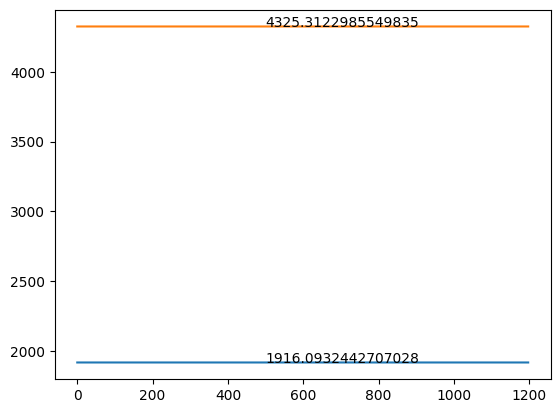

In [31]:
plt.plot([mfc1198[0]]*1198)
plt.plot([mfc1198[-1]]*1198)
plt.text(x=500,y=mfc1198[0],s=f'{mfc1198[0]}')
plt.text(x=500,y=mfc1198[-1],s=f'{mfc1198[-1]}')

In [32]:
pd.DataFrame(mfc90).to_csv("ethmfc90.csv")
pd.DataFrame(mfc1198).to_csv("ethmfc1198.csv")

In [33]:
pd.DataFrame(bbesc90).to_csv("ethbbesc90.csv")
pd.DataFrame(bbesc1198).to_csv("ethbbesc1198.csv")

In [34]:
pd.DataFrame(mm90).to_csv("ethmm90.csv")
pd.DataFrame(mm1198).to_csv("ethmm1198.csv")